In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


(50000, 32, 32, 3)

In [3]:
X_test.shape

(10000, 32, 32, 3)

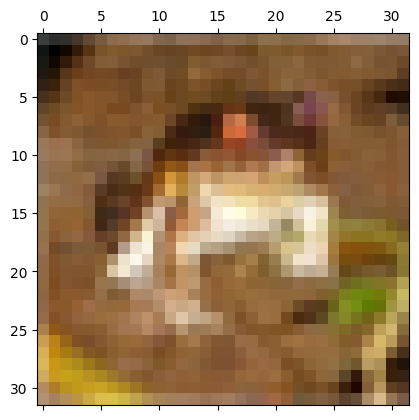

In [4]:
plt.matshow( X_train[0, :, :, ])

In [5]:
X_train[0][0:1024][0]

array([[ 59,  62,  63],
       [ 43,  46,  45],
       [ 50,  48,  43],
       [ 68,  54,  42],
       [ 98,  73,  52],
       [119,  91,  63],
       [139, 107,  75],
       [145, 110,  80],
       [149, 117,  89],
       [149, 120,  93],
       [131, 103,  77],
       [125,  99,  76],
       [142, 115,  91],
       [144, 112,  86],
       [137, 105,  79],
       [129,  97,  71],
       [137, 106,  79],
       [134, 106,  76],
       [124,  97,  64],
       [139, 113,  78],
       [139, 112,  75],
       [133, 105,  69],
       [136, 105,  74],
       [139, 108,  77],
       [152, 120,  89],
       [163, 131, 100],
       [168, 136, 108],
       [159, 129, 102],
       [158, 130, 104],
       [158, 132, 108],
       [152, 125, 102],
       [148, 124, 103]], dtype=uint8)

In [6]:
32*32

1024

In [7]:

y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [8]:
y_train = y_train.reshape(-1,1)

In [9]:
y_train = y_train.reshape(-1,)


y_train

In [10]:
y_test = y_test.reshape(-1,)
y_test

array([3, 8, 8, ..., 5, 1, 7], dtype=uint8)

In [11]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [12]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.matshow(X[index])
    plt.xlabel(classes[y[index]])

<Figure size 1500x200 with 0 Axes>

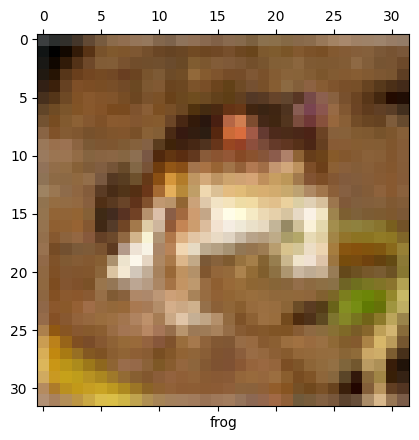

In [13]:
plot_sample(X_train, y_train, 0)

In [14]:
X_train = X_train / 255
X_test = X_test / 255

In [15]:
X_train[0]

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

In [16]:
ann=models.Sequential([

                layers.Flatten(input_shape=(32,32,3)),
                layers.Dense(3000, activation='relu'),
                layers.Dense(1500, activation='relu'),
                 layers.Dense(10, activation='softmax')
])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 153s 97ms/step - accuracy: 0.3001 - loss: 1.9339
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 154s 99ms/step - accuracy: 0.4185 - loss: 1.6458
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 195s 94ms/step - accuracy: 0.4555 - loss: 1.5488
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 199s 93ms/step - accuracy: 0.4748 - loss: 1.4905
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 201s 92ms/step - accuracy: 0.4985 - loss: 1.4321


In [17]:
y_pred=ann.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 28ms/step


In [18]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np

y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.56      0.56      0.56      1000
           1       0.67      0.54      0.60      1000
           2       0.36      0.38      0.37      1000
           3       0.43      0.17      0.24      1000
           4       0.40      0.41      0.41      1000
           5       0.43      0.36      0.39      1000
           6       0.46      0.66      0.54      1000
           7       0.45      0.69      0.54      1000
           8       0.56      0.67      0.61      1000
           9       0.63      0.47      0.54      1000

    accuracy                           0.49     10000
   macro avg       0.50      0.49      0.48     10000
weighted avg       0.50      0.49      0.48     10000



In [19]:
y_pred

array([[0.02542157, 0.03849481, 0.09832287, ..., 0.00353285, 0.07866162,
        0.00272614],
       [0.08667147, 0.12402494, 0.01061467, ..., 0.0033695 , 0.46168965,
        0.3020903 ],
       [0.24315138, 0.04536176, 0.01470642, ..., 0.00469192, 0.617508  ,
        0.0583321 ],
       ...,
       [0.00270356, 0.00134725, 0.18073145, ..., 0.04011856, 0.01386397,
        0.00340966],
       [0.0324105 , 0.00886276, 0.1688601 , ..., 0.06704918, 0.00551454,
        0.00433799],
       [0.02962218, 0.00674197, 0.10964614, ..., 0.5669408 , 0.00550332,
        0.01192182]], dtype=float32)

In [20]:
y_pred

array([[0.02542157, 0.03849481, 0.09832287, ..., 0.00353285, 0.07866162,
        0.00272614],
       [0.08667147, 0.12402494, 0.01061467, ..., 0.0033695 , 0.46168965,
        0.3020903 ],
       [0.24315138, 0.04536176, 0.01470642, ..., 0.00469192, 0.617508  ,
        0.0583321 ],
       ...,
       [0.00270356, 0.00134725, 0.18073145, ..., 0.04011856, 0.01386397,
        0.00340966],
       [0.0324105 , 0.00886276, 0.1688601 , ..., 0.06704918, 0.00551454,
        0.00433799],
       [0.02962218, 0.00674197, 0.10964614, ..., 0.5669408 , 0.00550332,
        0.01192182]], dtype=float32)

In [21]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [22]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [23]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 64s 40ms/step - accuracy: 0.3814 - loss: 1.6973
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 80s 38ms/step - accuracy: 0.6112 - loss: 1.1055
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 80s 37ms/step - accuracy: 0.6596 - loss: 0.9709
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 59s 38ms/step - accuracy: 0.7003 - loss: 0.8674
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 37ms/step - accuracy: 0.7222 - loss: 0.7884
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 38ms/step - accuracy: 0.7549 - loss: 0.7165
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 59s 37ms/step - accuracy: 0.7695 - loss: 0.6667
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 87s 41ms/step - accuracy: 0.7858 - loss: 0.6168
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 59s 38ms/step - accuracy: 0.7999 - loss: 0.5679
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 80s 37ms/step - accuracy: 0.8106 - loss: 0.5352


In [24]:
cnn.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 19ms/step - accuracy: 0.6976 - loss: 0.9555


[0.9722156524658203, 0.6901000142097473]

In [25]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step


array([[3.4922065e-05, 3.2671051e-07, 2.2696078e-04, 9.5878524e-01,
        1.2367954e-04, 3.9845243e-02, 9.2313869e-04, 8.9794895e-07,
        5.2588071e-05, 6.9356065e-06],
       [3.0431358e-04, 6.2204397e-01, 1.8581899e-05, 1.2341420e-06,
        3.6497291e-08, 3.0900143e-08, 9.3118393e-09, 2.8326824e-07,
        3.7408927e-01, 3.5422484e-03],
       [1.4197092e-01, 7.8463573e-03, 2.1532204e-02, 1.2547761e-01,
        3.6549724e-03, 3.1532969e-02, 1.6423441e-03, 1.2140197e-02,
        6.5185457e-01, 2.3478784e-03],
       [9.4840044e-01, 1.3211529e-05, 1.1673548e-02, 5.3146128e-03,
        1.6370676e-02, 4.5156889e-04, 2.7474979e-04, 4.5419010e-04,
        1.7036093e-02, 1.0826089e-05],
       [2.5330610e-07, 1.9459353e-06, 1.2558543e-03, 4.0150486e-02,
        6.2663294e-02, 6.3711097e-03, 8.8955247e-01, 3.1779035e-07,
        4.3415525e-06, 4.3789203e-09]], dtype=float32)

In [26]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 1, 8, 0, 6]

In [27]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

<Figure size 1500x200 with 0 Axes>

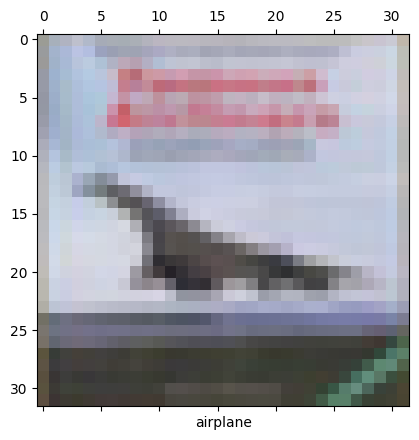

In [28]:
plot_sample(X_test, y_test,3)